# Figure of complex source from Neuron

Make a figure of the features learnt

In [1]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
from catalog import Pink
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

/Users/gal16b/Documents/Postdoc_Work/PINK/Notebook/catalog.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/gal16b/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/gal16b/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
  

In [2]:
pink = Pink.loader('Script_Experiments_Fractions_Trials/FIRST_WISE_W1_Norm_Log_3_12x12_Trial0/trained.pink')

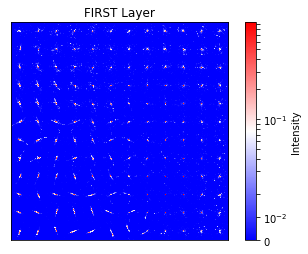

In [3]:
pink.show_som()
first = pink.retrieve_som_data(channel=0)

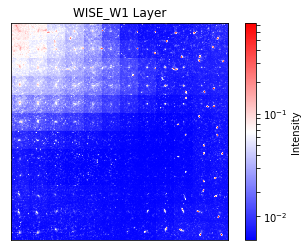

In [4]:
pink.show_som(channel=1)
wise = pink.retrieve_som_data(channel=1)

In [23]:
def extract_neuron(dataset, x, y):
    '''Helper to extract a specific neuron fromt eh data
    '''
    binary, data, som_height, som_width, channel, n_width, n_height = dataset
    
    return data[y*n_width:(y+1)*n_width, 
                x*n_width:(x+1)*n_width]

def plot_neurons(f_n, w_n, save=None):
    fig, ax = plt.subplots(1,2)
    cmap=plt.get_cmap('bwr')

    if isinstance(f_n, int):
        f_nd = extract_neuron(first, f_n, w_n)
        w_nd = extract_neuron(wise, f_n, w_n)    
        f_n, w_n = f_nd, w_nd
    
    PIX=1.8
    OFF_X = f_n.shape[0]//2
    OFF_Y = f_n.shape[1]//2
    extent = [-OFF_X*PIX, OFF_X*PIX, -OFF_Y*PIX,OFF_Y*PIX]


    ax[0].imshow(f_n, cmap=cmap, norm=mpl.colors.SymLogNorm(0.03), extent=extent)
    ax[0].contour(w_n,origin='image', extent=extent, levels=np.arange(5*w_n.std(), w_n.max(), 8*w_n.std()),
                 linewidths=1, colors='black', cmap=None)
#     ax[0].contour(f_n,origin='image', extent=extent)
    ax[0].set(xlabel="$\Delta''$", ylabel="$\Delta''$", title='FIRST')
# 
#     ax[1].imshow(w_n, cmap=cmap, norm=mpl.colors.SymLogNorm(0.15), extent=extent)
    ax[1].imshow(w_n, cmap=cmap, extent=extent)
    ax[1].contour(f_n,origin='image', extent=extent, levels=np.arange(2*f_n.std(), f_n.max(), 8*f_n.std()),
                 linewidths=1, colors='black', cmap=None)
    ax[1].set(xlabel="$\Delta''$", ylabel="$\Delta''$", title='WISE W1')
    ax[1].yaxis.tick_right()
    ax[1].yaxis.set_label_position('right')

    fig.tight_layout()
    if save is None:
        fig.show()
    else:
        fig.savefig(save)
#     plt.close(fig)

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


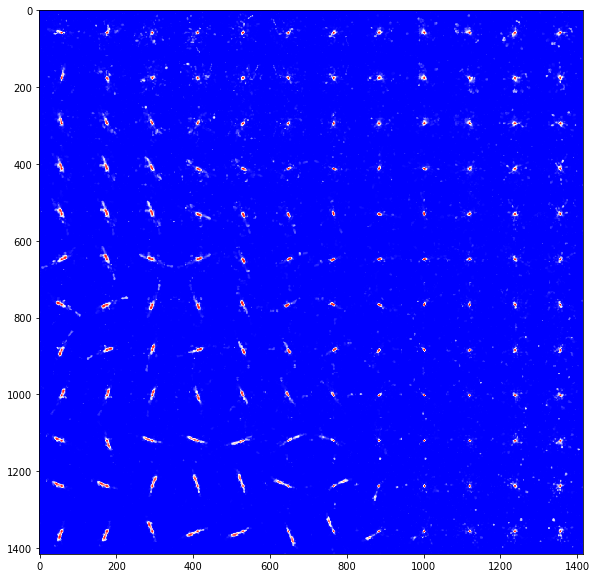

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
cmap=plt.get_cmap('bwr')

ax.imshow(first[1], cmap=cmap, norm=mpl.colors.SymLogNorm(0.03))

fig.show()

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


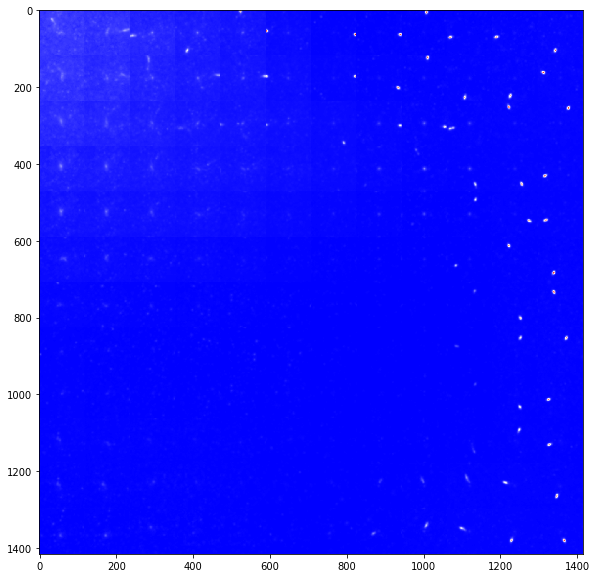

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.imshow(wise[1], cmap=cmap)
# ax.imshow(wise[1], cmap=cmap, norm=mpl.colors.SymLogNorm(0.03))

fig.show()

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


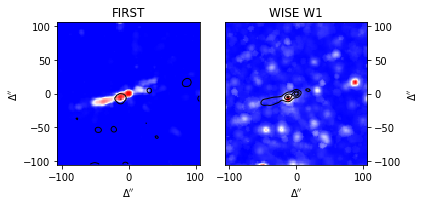

In [26]:
plot_neurons(4,9)

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


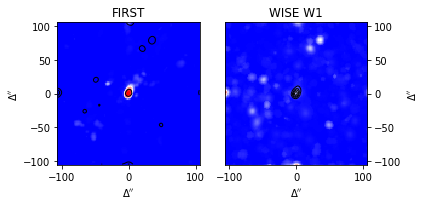

In [27]:
plot_neurons(8,6)

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


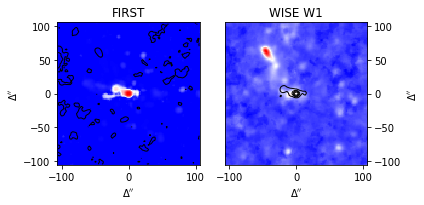

In [28]:
plot_neurons(0,0)

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


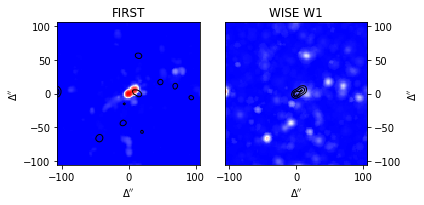

In [29]:
plot_neurons(6,7)

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


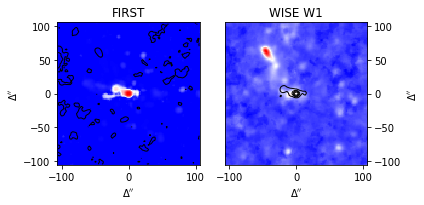

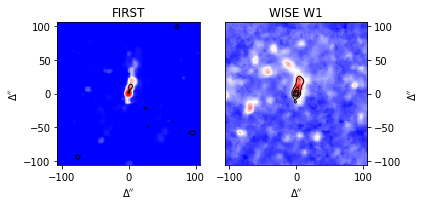

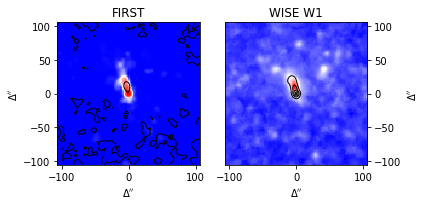

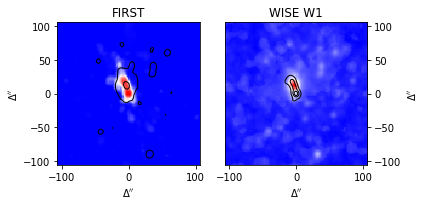

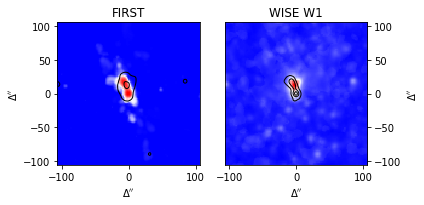

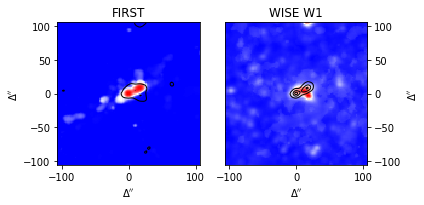

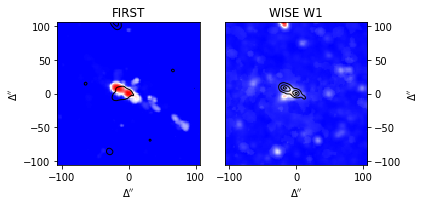

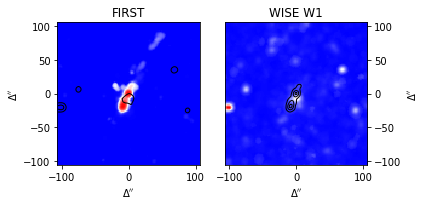

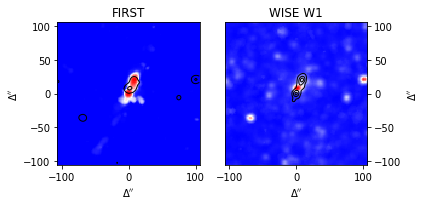

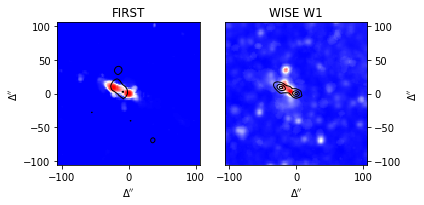

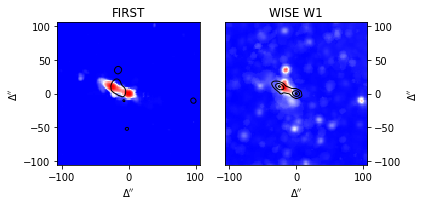

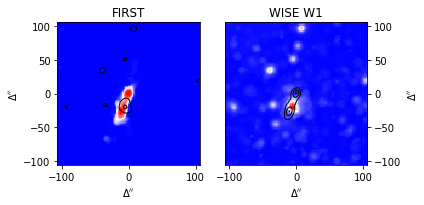

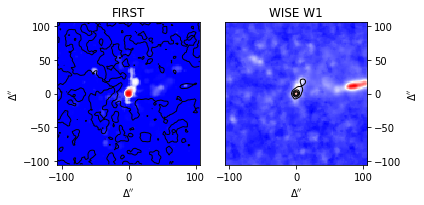

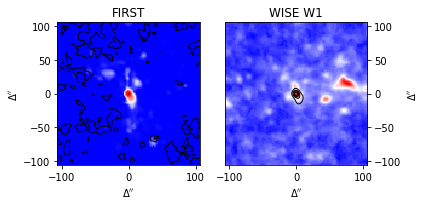

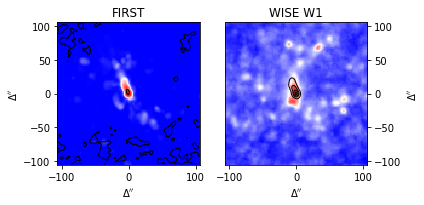

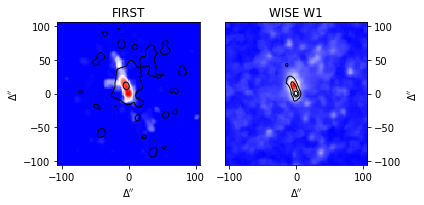

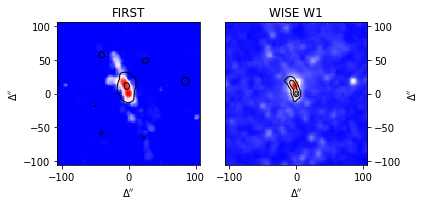

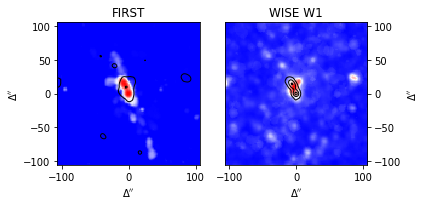

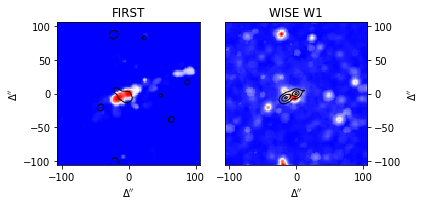

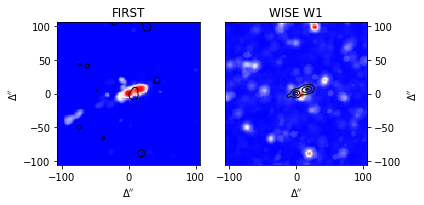

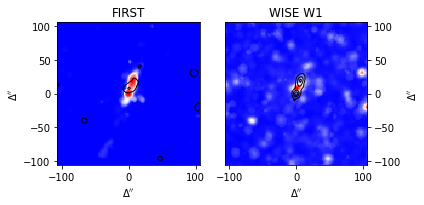

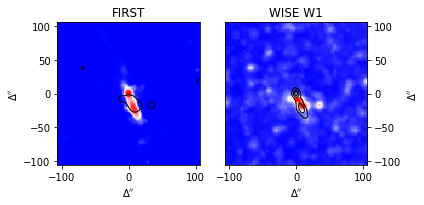

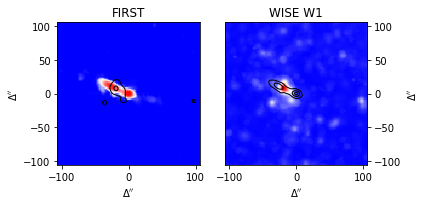

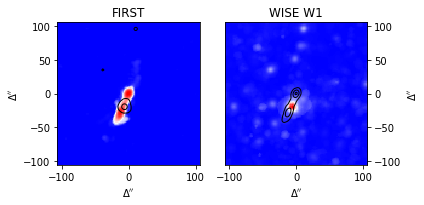

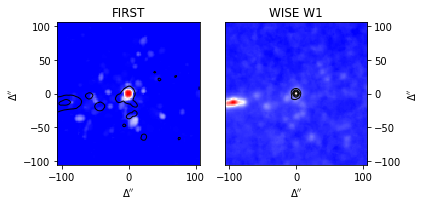

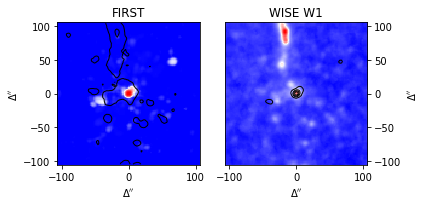

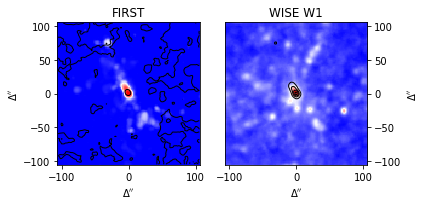

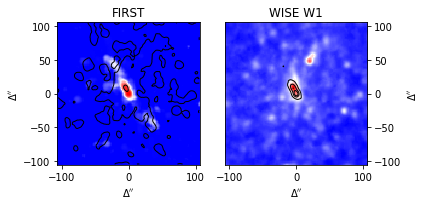

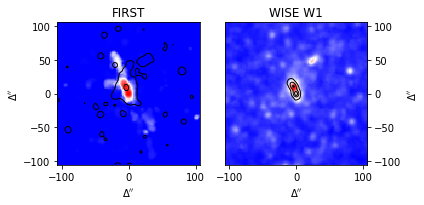

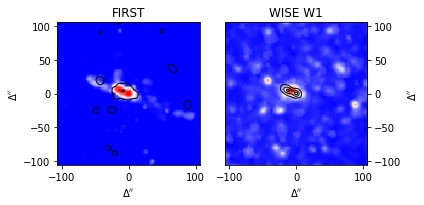

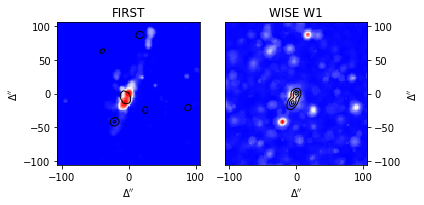

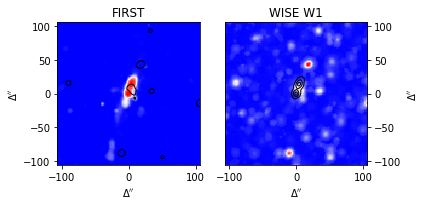

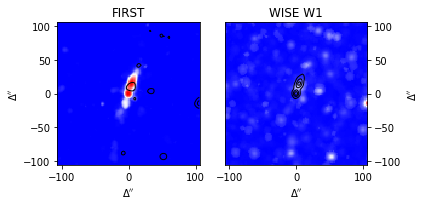

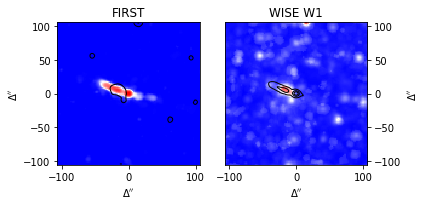

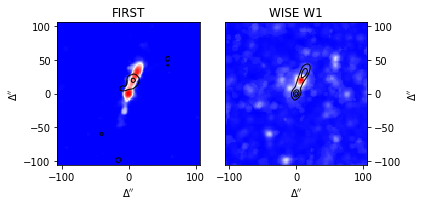

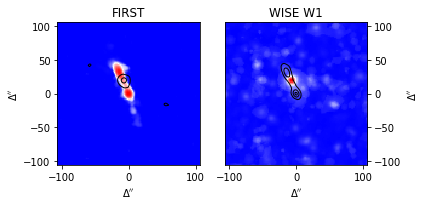

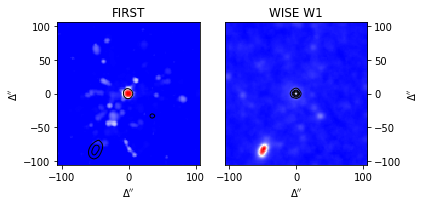

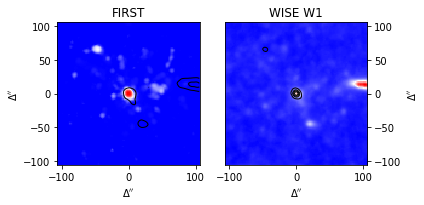

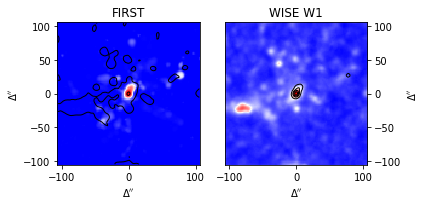

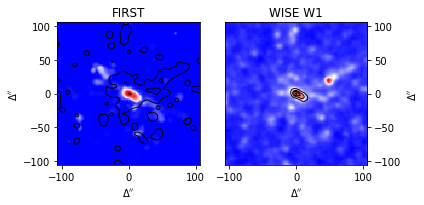

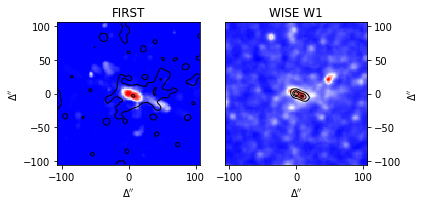

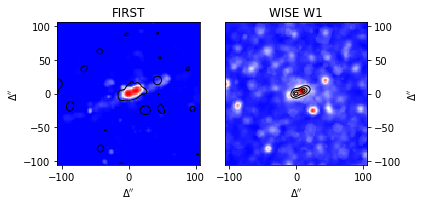

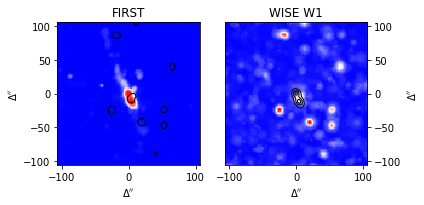

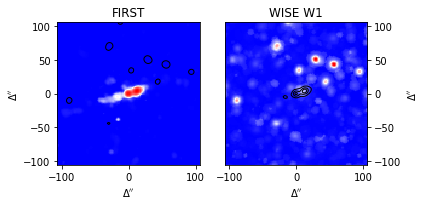

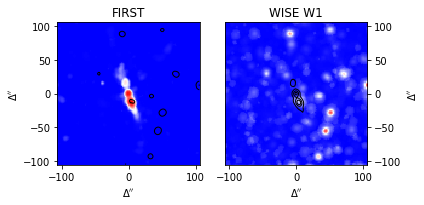

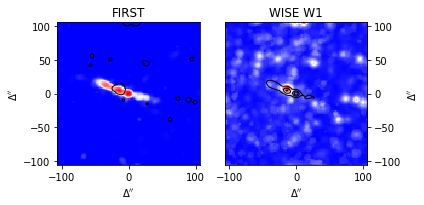

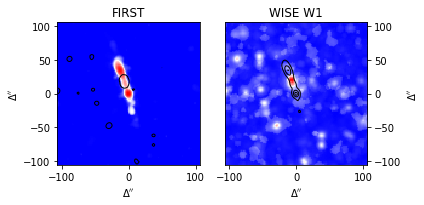

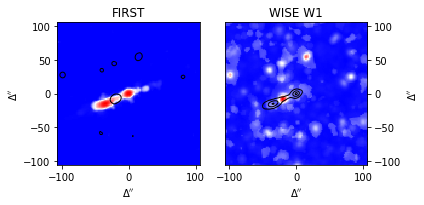

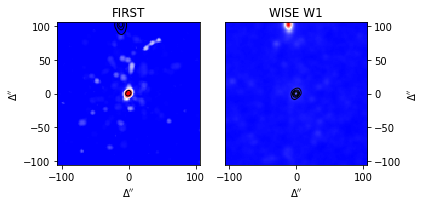

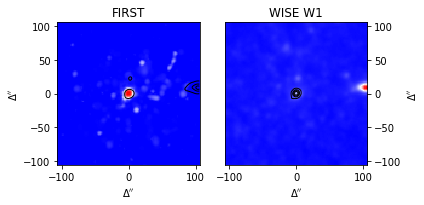

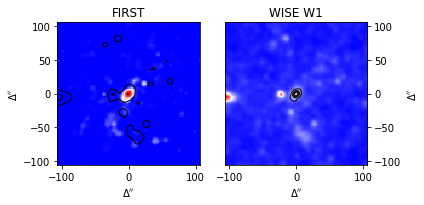

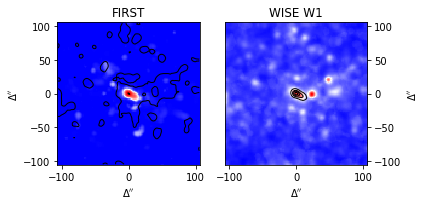

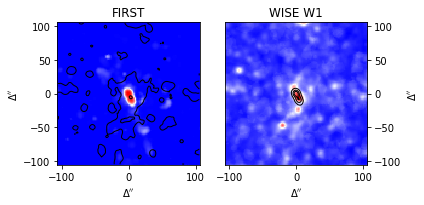

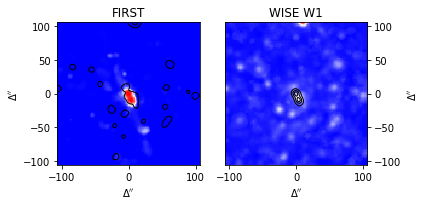

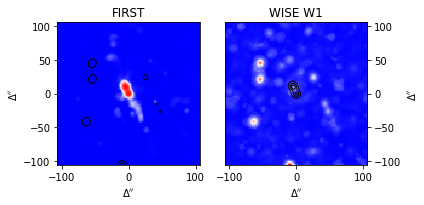

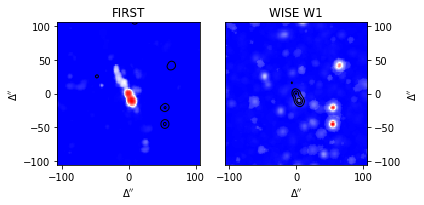

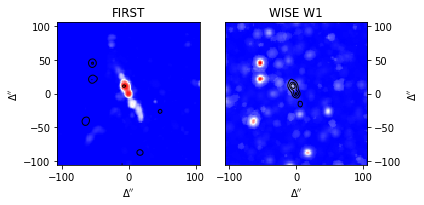

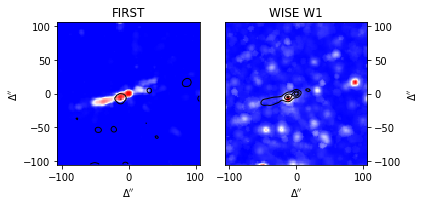

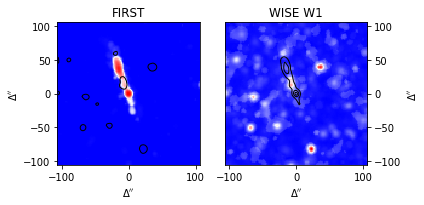

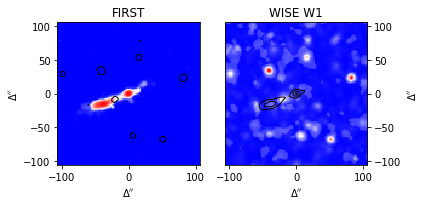

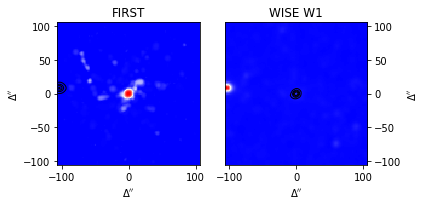

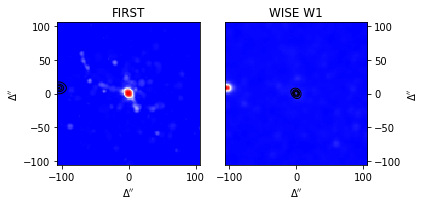

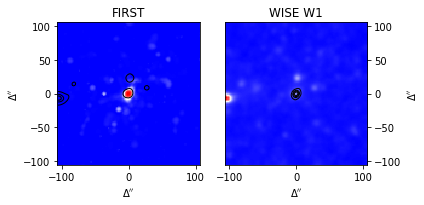

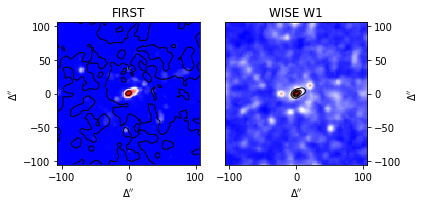

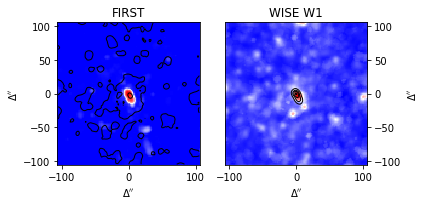

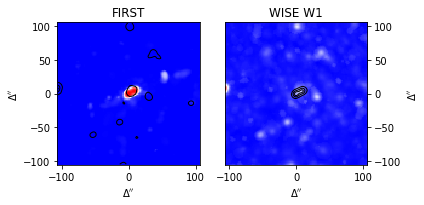

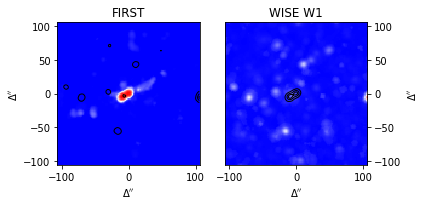

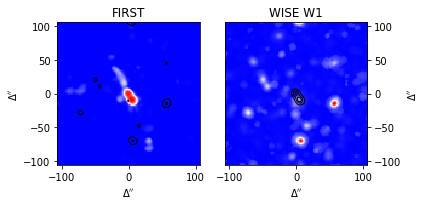

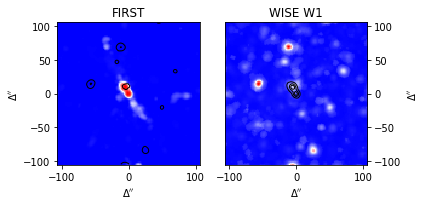

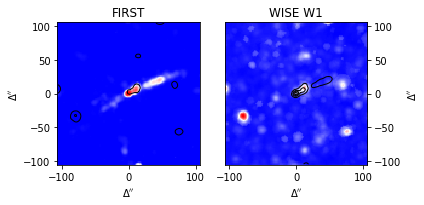

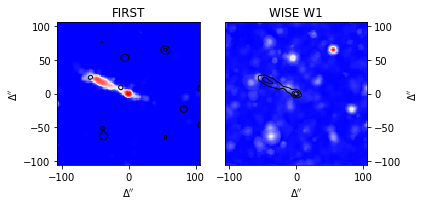

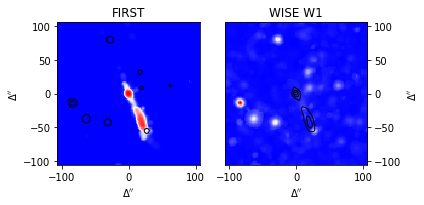

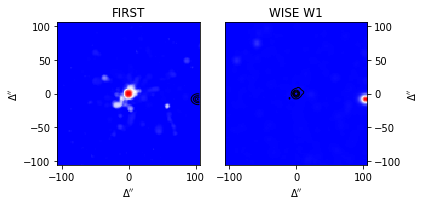

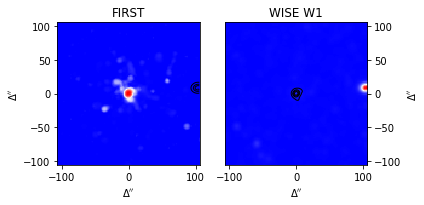

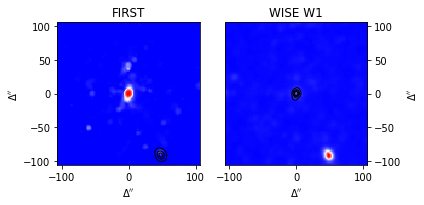

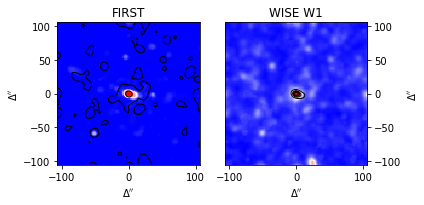

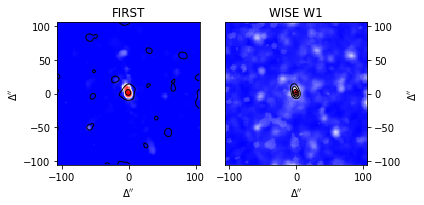

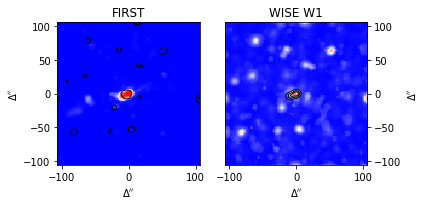

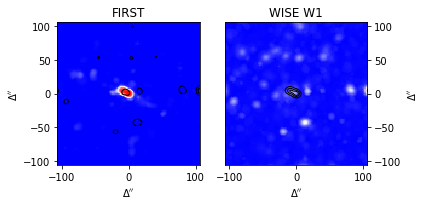

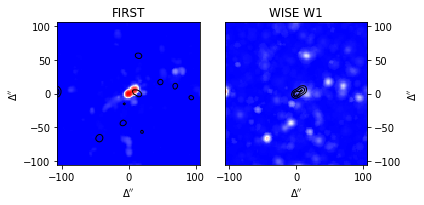

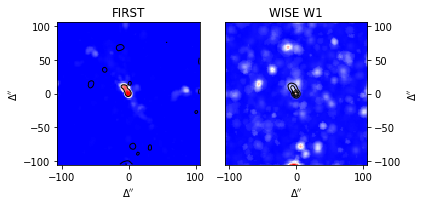

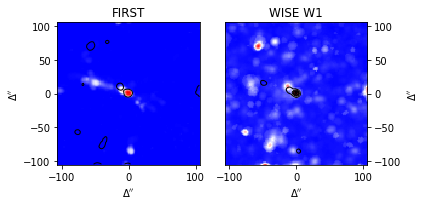

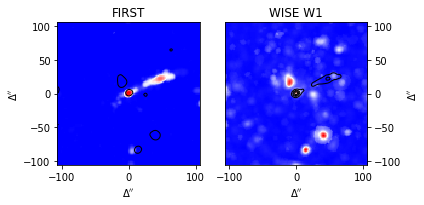

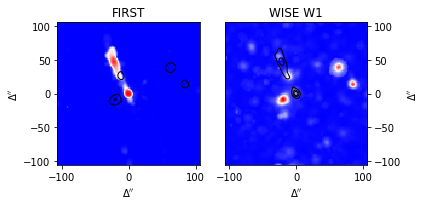

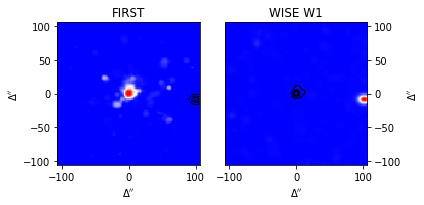

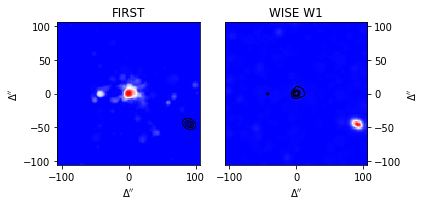

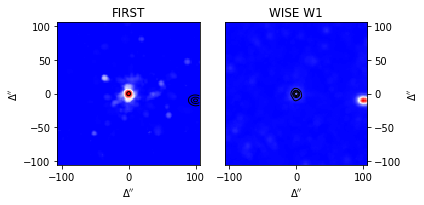

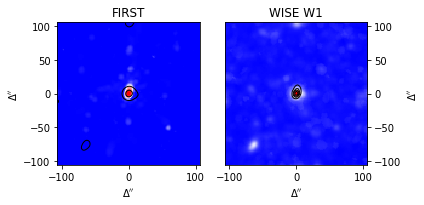

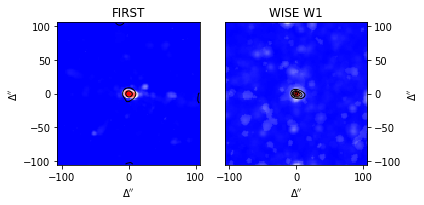

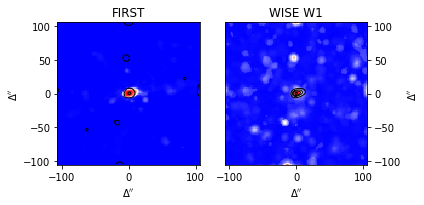

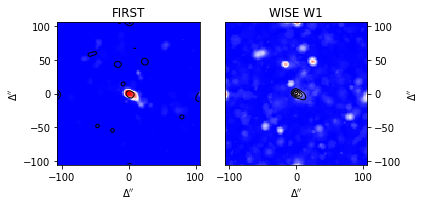

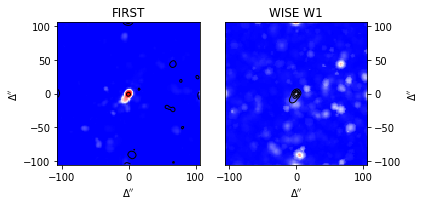

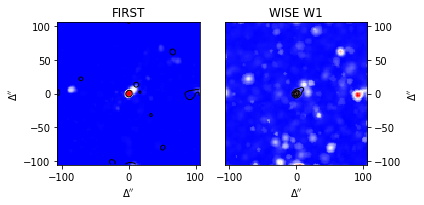

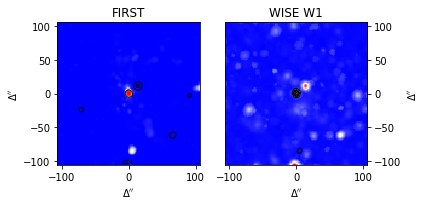

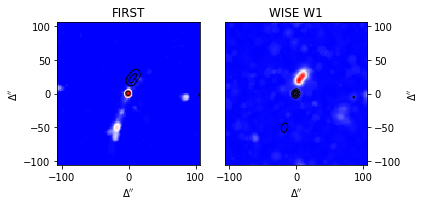

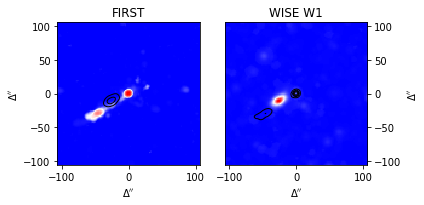

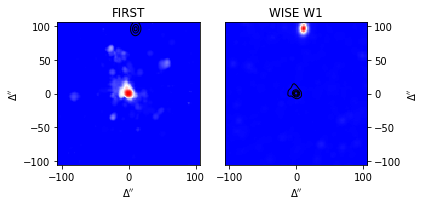

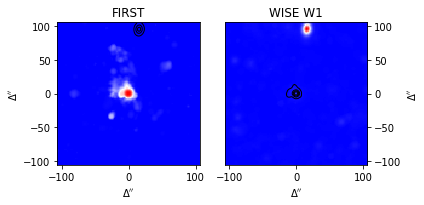

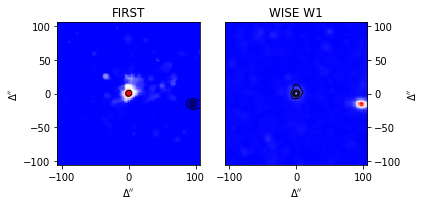

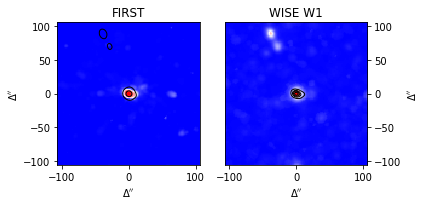

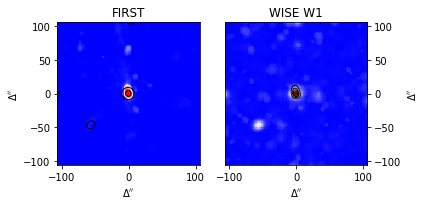

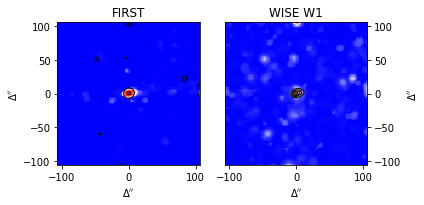

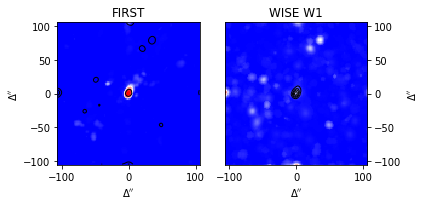

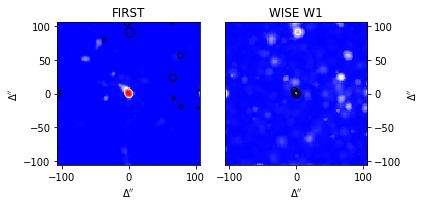

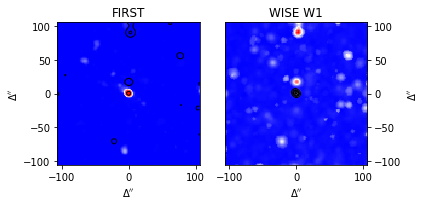

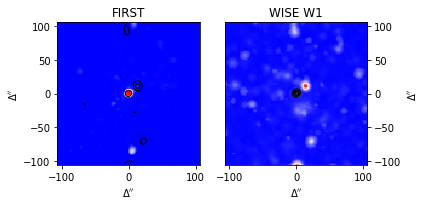

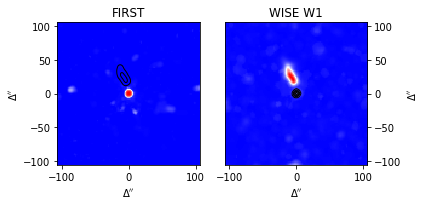

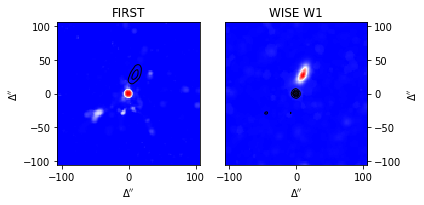

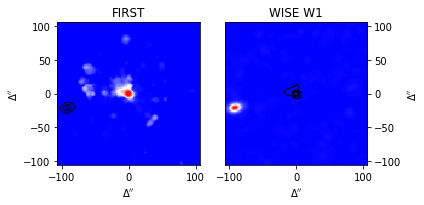

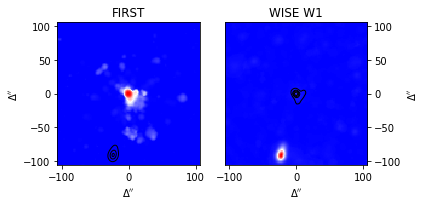

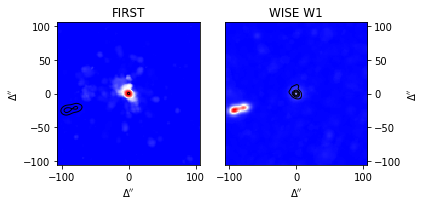

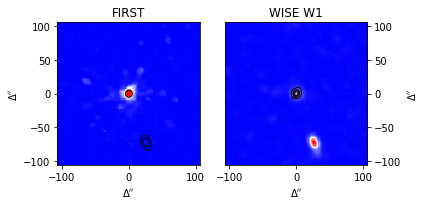

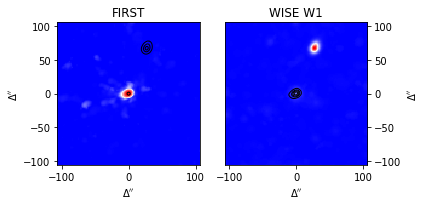

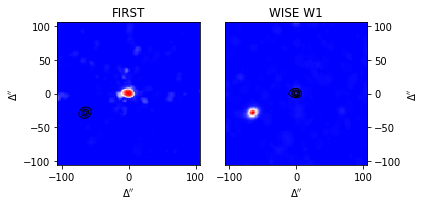

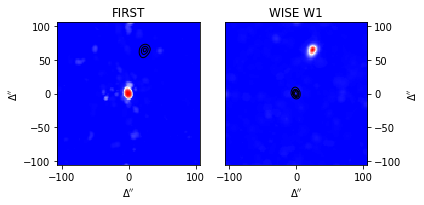

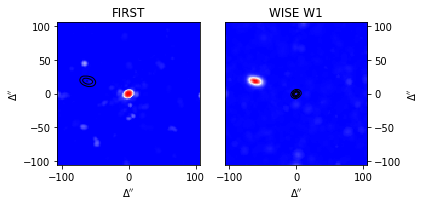

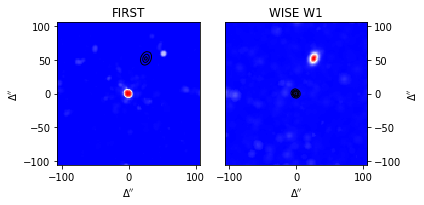

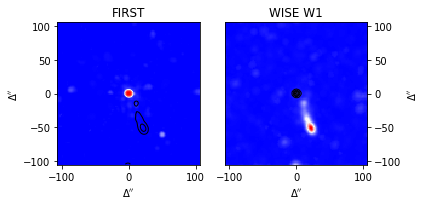

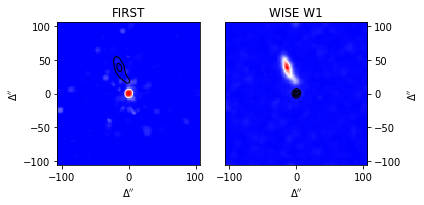

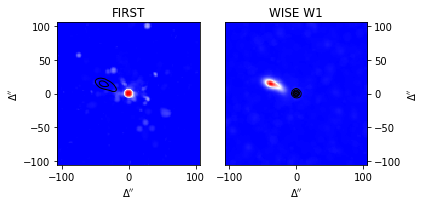

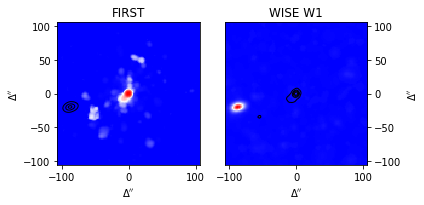

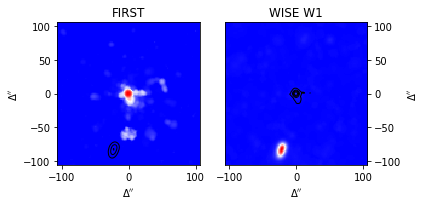

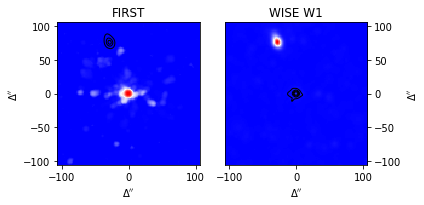

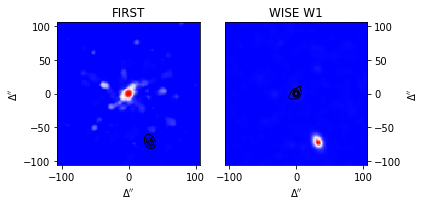

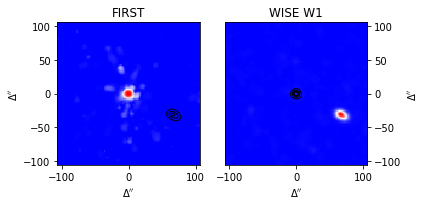

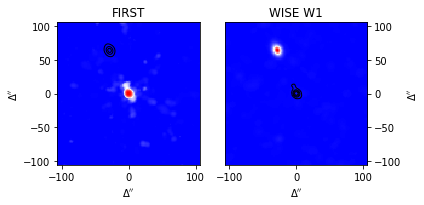

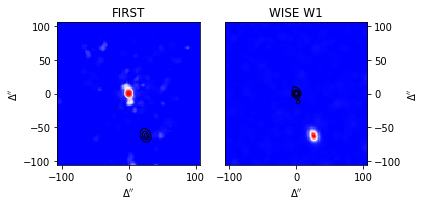

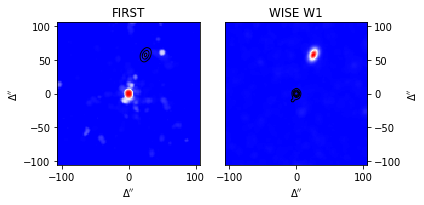

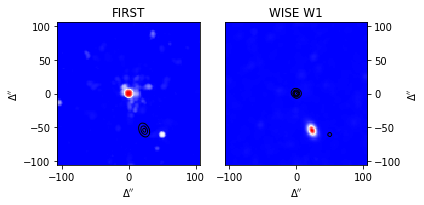

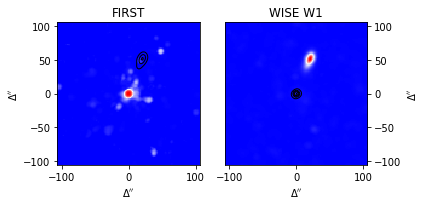

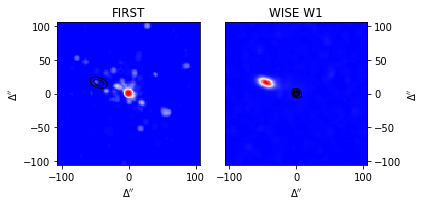

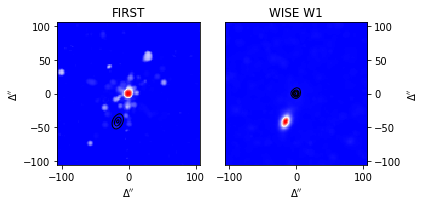

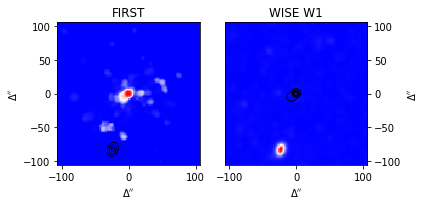

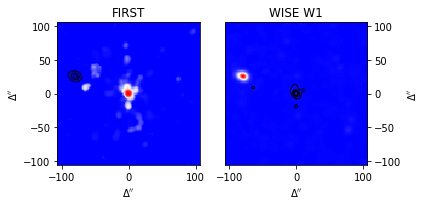

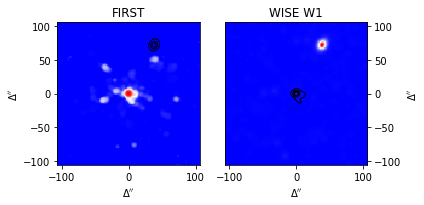

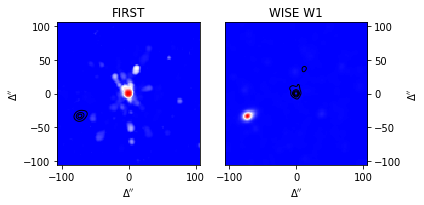

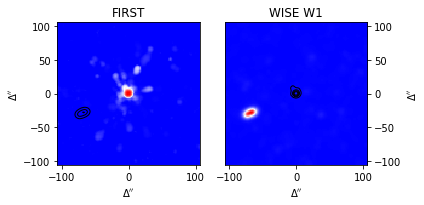

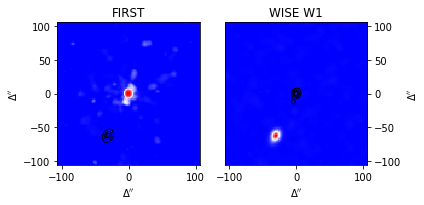

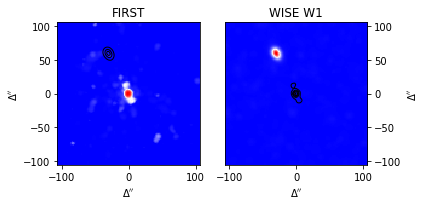

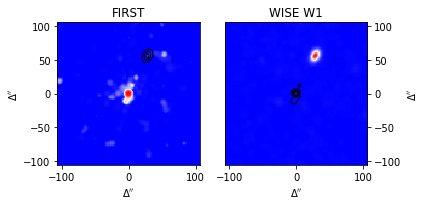

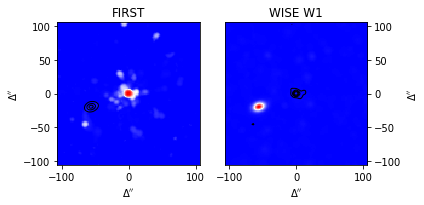

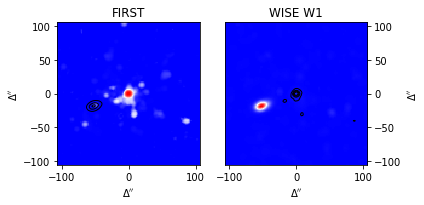

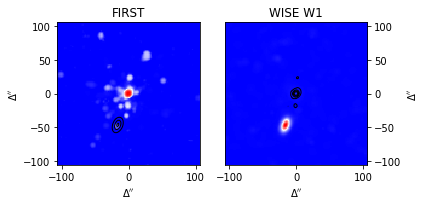

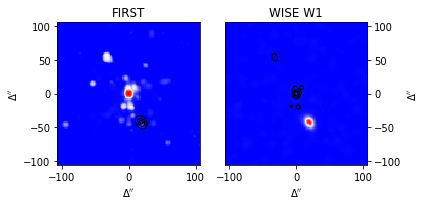

In [30]:
for x in range(12):
    for y in range(12):
        plot_neurons(x,y, save=f'Images/Neurons/{x}-{y}.pdf')

In [31]:
plt.close('all')